In [ ]:
"""
(5) Classificação com Random Forest

Crie um modelo Random Forest para prever dígitos escritos à mão (utilize o conjunto
de dados Digits do Scikit-Learn). Avalie o modelo utilizando a matriz de confusão e o
F1-Score.
__________________________________________________________________________________________
(5) Classification with Random Forest

Create a Random Forest model to predict handwritten digits (use the Digits dataset
from Scikit-Learn). Evaluate the model using a confusion matrix and the F1-Score.

"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report

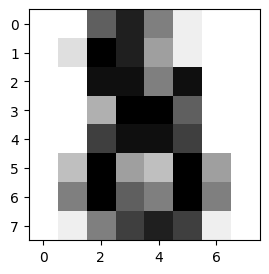

In [ ]:
digits = load_digits()

# Checking if it's loaded correctly
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [ ]:
# This generates a matrix with images in vector format. Each digit image
# in the Digits set is an 8x8 pixel image, flattened into a one-dimensional
# vector with 64 elements (8x8 = 64).
x = digits.data

y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Just checking the split percentages
total_samples = len(x)
train_percentage = (len(x_train) / total_samples) * 100
test_percentage = (len(x_test) / total_samples) * 100
print(f"In the training set: {train_percentage:.2f}%")
print(f"In the testing set: {test_percentage:.2f}%")

In the training set: 74.96%
In the testing set: 25.04%


In [ ]:
# Training
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# Predicting
y_pred = model.predict(x_test)

In [ ]:
# MEASURING F1-SCORE (in different calculation methods, just to make sure)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f'Macro F1 Score: {f1_macro:.2f}')
print(f'Micro F1 Score: {f1_micro:.2f}')
print(f'Weighted F1 Score: {f1_weighted:.2f}')

Macro F1 Score: 0.98
Micro F1 Score: 0.98
Weighted F1 Score: 0.98


In [ ]:
# MODEL CONFUSION MATRIX
conf_matrix = confusion_matrix(y_test, y_pred)
print("MODEL CONFUSION MATRIX:")
print(conf_matrix)

MODEL CONFUSION MATRIX:
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  1  0  0  2  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 58  1  0  0  0]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  2  0  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0  1  0 47]]


In [ ]:
# MODEL ACCURACY AND CLASSIFICATION REPORT
digits_accuracy = accuracy_score(y_test, y_pred)
digits_classif_report = classification_report(y_test, y_pred)

print("ACCURACY SCORE:")
print(digits_accuracy)
print("\n")
print("CLASSIFICATION REPORT:")
print(digits_classif_report)

ACCURACY SCORE:
0.9777777777777777


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       1.00      0.93      0.97        46
           4       0.98      1.00      0.99        55
           5       0.97      0.98      0.97        59
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       0.95      0.95      0.95        38
           9       0.98      0.98      0.98        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [ ]:
# Comparing the training set accuracy with the testing set accuracy
y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"TRAINING SET ACCURACY SCORE: {train_accuracy * 100:.2f}%")

y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"TESTING SET ACCURACY SCORE: {test_accuracy * 100:.2f}%")

TRAINING SET ACCURACY SCORE: 100.00%
TESTING SET ACCURACY SCORE: 97.78%


In [ ]:
# Restricting RandomForest with attributes to help prevent overfitting
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred_2 = model.predict(x_test)

y_train_pred_2 = model.predict(x_train)
train_accuracy_2 = accuracy_score(y_train, y_train_pred_2)
print(f"TRAINING SET ACCURACY SCORE #2: {train_accuracy_2 * 100:.2f}%")

y_test_pred_2 = model.predict(x_test)
test_accuracy_2 = accuracy_score(y_test, y_test_pred_2)
print(f"TESTING SET ACCURACY SCORE #2: {test_accuracy_2 * 100:.2f}%")
print("\n")

digits_classif_report_2 = classification_report(y_test, y_pred_2)
print("CLASSIFICATION REPORT #2:")
print(digits_classif_report)

TRAINING SET ACCURACY SCORE #2: 97.25%
TESTING SET ACCURACY SCORE #2: 95.33%


CLASSIFICATION REPORT #2:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       1.00      0.93      0.97        46
           4       0.98      1.00      0.99        55
           5       0.97      0.98      0.97        59
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       0.95      0.95      0.95        38
           9       0.98      0.98      0.98        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [ ]:
f1_macro_2 = f1_score(y_test, y_pred_2, average='macro')
f1_micro_2 = f1_score(y_test, y_pred_2, average='micro')
f1_weighted_2 = f1_score(y_test, y_pred_2, average='weighted')

print(f'Macro F1 Score #2: {f1_macro_2:.2f}')
print(f'Micro F1 Score #2: {f1_micro_2:.2f}')
print(f'Weighted F1 Score #2: {f1_weighted_2:.2f}')
print("\n")

conf_matrix_2 = confusion_matrix(y_test, y_pred_2)
print("MODEL CONFUSION MATRIX #2:")
print(conf_matrix_2)

Macro F1 Score #2: 0.95
Micro F1 Score #2: 0.95
Weighted F1 Score #2: 0.95


MODEL CONFUSION MATRIX #2:
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 34  2  0  0  0  0  0  0  1]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  1  0 42  0  0  0  0  3  0]
 [ 0  0  0  0 54  0  0  1  0  0]
 [ 0  1  0  0  0 56  1  0  0  1]
 [ 0  0  0  0  1  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  2  0  0  0  1  0  0 34  1]
 [ 0  0  0  0  0  1  0  3  0 44]]
